# Importing Packages and Inicial Data Preview

In [54]:
# Importing packages

import pandas as pd
import numpy as np

import requests

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from category_encoders import LeaveOneOutEncoder

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from itertools import combinations
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [55]:
# loading dataset and handle a subset of it

df = pd.read_csv("US_Accidents_March23_sampled_500k.csv")

In [56]:
df.shape

(500000, 46)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [58]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [59]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


# Exploratory Data Analysis

### Data Overview

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,500000.0,2.212748,0.486661,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,500000.0,36.206421,5.071411,24.562117,33.416823,35.832147,40.082443,48.999569
Start_Lng,500000.0,-94.736583,17.405761,-124.497420,-117.233047,-87.794365,-80.359601,-67.484130
End_Lat,279623.0,36.273192,5.265333,24.570110,33.474773,36.192669,40.181341,48.998901
End_Lng,279623.0,-95.776553,18.120211,-124.497419,-117.778324,-88.039013,-80.252449,-67.484130
Distance(mi),500000.0,0.564317,1.774872,0.000000,0.000000,0.029000,0.465000,193.479996
Temperature(F),489534.0,61.646254,19.000133,-77.800000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),370983.0,58.229028,22.352246,-53.200000,43.000000,62.000000,75.000000,207.000000
Humidity(%),488870.0,64.834921,22.826158,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),491072.0,29.536621,1.008666,0.120000,29.370000,29.860000,30.030000,38.440000


In [61]:
df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

In [62]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df) * 100
missing_percentage[missing_percentage !=0]

End_Lng                  44.0754
End_Lat                  44.0754
Precipitation(in)        28.5232
Wind_Chill(F)            25.8034
Wind_Speed(mph)           7.3974
Visibility(mi)            2.2582
Wind_Direction            2.2394
Humidity(%)               2.2260
Weather_Condition         2.2202
Temperature(F)            2.0932
Pressure(in)              1.7856
Weather_Timestamp         1.5348
Sunrise_Sunset            0.2966
Civil_Twilight            0.2966
Astronomical_Twilight     0.2966
Nautical_Twilight         0.2966
Airport_Code              0.2892
Street                    0.1382
Timezone                  0.1014
Zipcode                   0.0232
City                      0.0038
Description               0.0002
dtype: float64

In [63]:
df.duplicated().sum()

np.int64(0)

### Severity Analysis

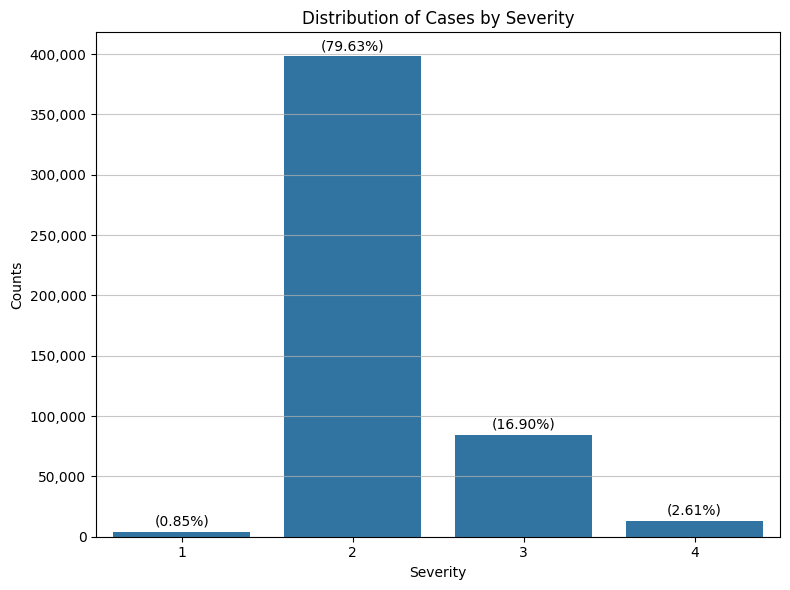

In [64]:
# What is the proportion of accidents by severity levels?

severity_counts = df['Severity'].value_counts().sort_index()
total_cases = df.shape[0]
severity_percentages = (severity_counts / total_cases) * 100

severity_df = pd.DataFrame({
    'Severity': severity_counts.index,
    'Counts': severity_counts.values,
    'Percentage': severity_percentages.values
})

plt.figure(figsize=(8, 6))
sns.barplot(data=severity_df, x = "Severity", y="Counts")
for i, row in severity_df.iterrows():
    plt.text(i, row['Counts'] + total_cases * 0.01,
             f"({row['Percentage']:.2f}%)", 
             ha='center') 
    
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.title('Distribution of Cases by Severity')
plt.xlabel('Severity')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

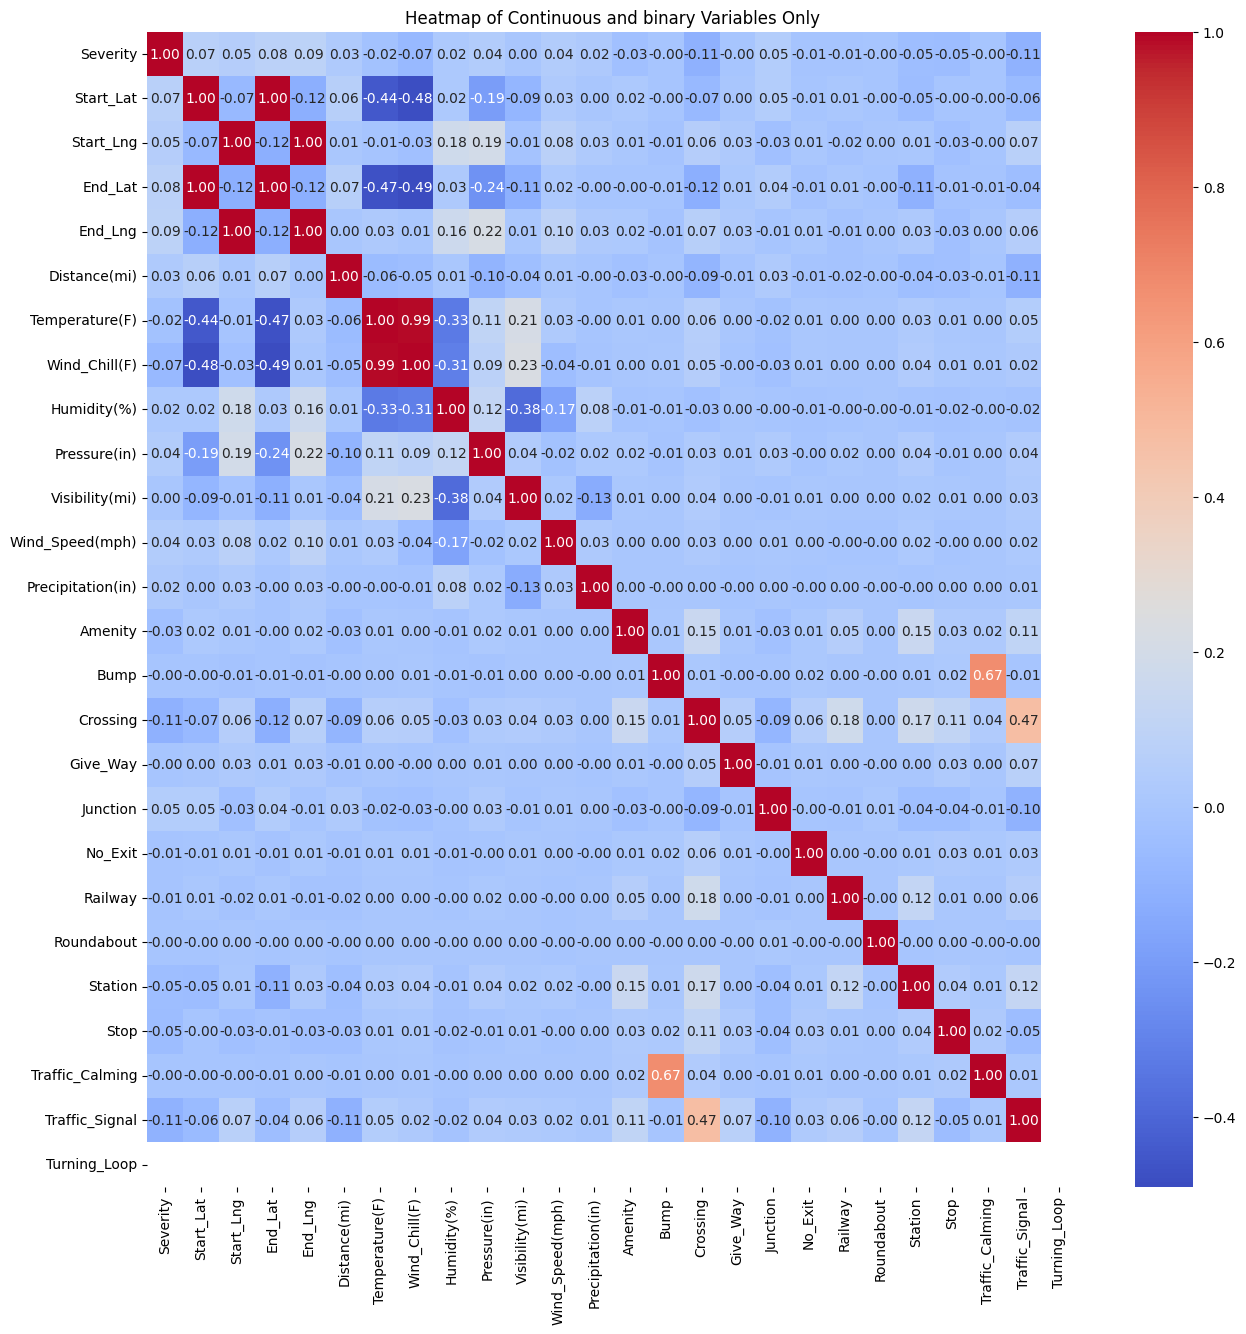

In [65]:
# There are any feature that correlates with severity directly?

corr_data = df.select_dtypes(include=[np.number,"boolean"])
corr = corr_data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Continuous and binary Variables Only")
plt.show()

In [66]:
print("Number of unique Weather Conditions:", len(df["Weather_Condition"].unique()))
print("List of unique weather conditions:", list(df["Weather_Condition"].unique()))

Number of unique Weather Conditions: 109
List of unique weather conditions: ['Fair', 'Wintry Mix', 'Light Rain', 'Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Clear', 'Scattered Clouds', 'Fog', 'Overcast', 'Light Snow', 'T-Storm', nan, 'Thunderstorms and Rain', 'Thunder', 'Light Rain with Thunder', 'Rain', 'Showers in the Vicinity', 'Mostly Cloudy / Windy', 'Heavy Rain', 'Cloudy / Windy', 'Light Drizzle', 'Heavy T-Storm', 'Light Rain / Windy', 'Smoke', 'Haze', 'Blowing Dust / Windy', 'N/A Precipitation', 'Thunder in the Vicinity', 'Snow', 'Heavy Thunderstorms and Rain', 'Shallow Fog', 'Light Freezing Drizzle', 'Fair / Windy', 'Patches of Fog', 'Light Snow / Windy', 'Blowing Snow / Windy', 'Thunderstorm', 'Drizzle', 'T-Storm / Windy', 'Partly Cloudy / Windy', 'Heavy Rain / Windy', 'Heavy Snow / Windy', 'Mist', 'Light Thunderstorms and Rain', 'Rain / Windy', 'Light Freezing Rain', 'Heavy Snow', 'Light Ice Pellets', 'Heavy T-Storm / Windy', 'Heavy Drizzle', 'Sleet', 'Light Rain Shower', 'H

In [67]:
# Feature Engineering on Weather_Condition for Cramér's V Correlation Matrix

df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = "Unknown"
df['Weather_Condition'] = df['Weather_Condition'].fillna('Unknown')

list(df['Weather_Condition'].unique()) 

['Clear',
 'Snow',
 'Rain',
 'Cloudy',
 'Fog',
 'Thunderstorm',
 'Unknown',
 'Windy',
 'Smoke',
 'Hail',
 'Sand',
 'Tornado']

In [68]:
df_sampled = df.sample(n=20000, random_state=42)  

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
remove = ['ID','Source','Start_Time','End_Time','Description','Weather_TimeStamp','Street','Zipcode','Country']

categorical_features = [x for x in categorical_features if x not in remove]

print("Categorical Features:", categorical_features)

Categorical Features: ['City', 'County', 'State', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


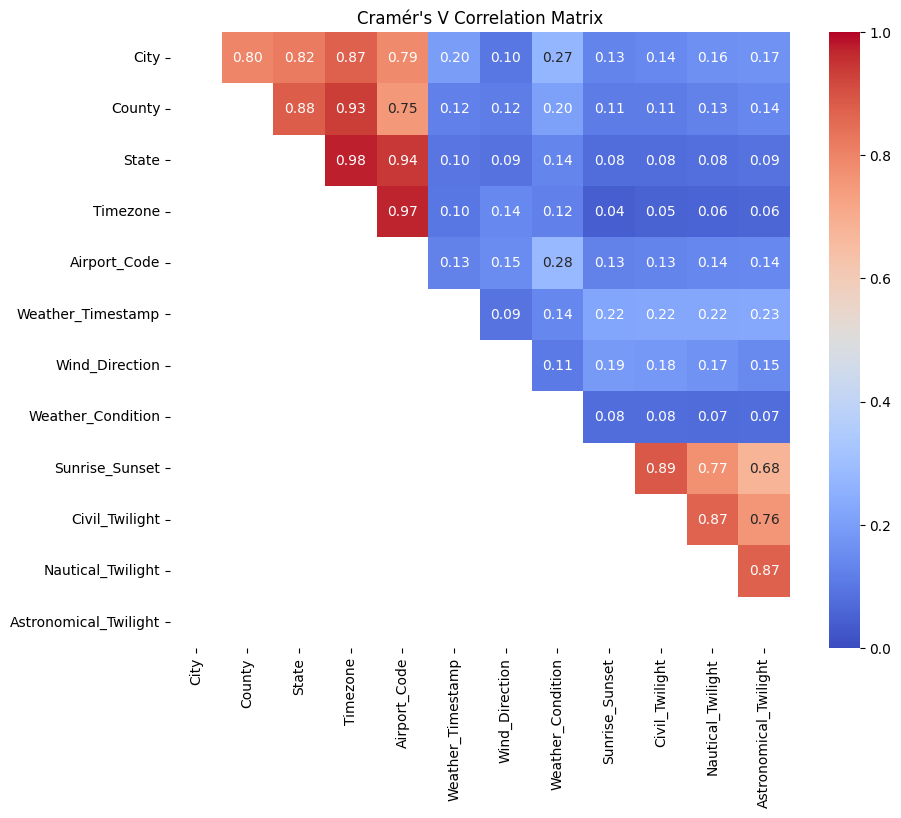

In [69]:
# Is there a relashionship between categorical features?

# Use of Cramer's V correlation to check the correlation between categorical feaures
# Implementation by: https://www.geeksforgeeks.org/calculate-cramer-s-coefficient-matrix-using-pandas/
# And some modifications (heatmap + combinations) by Pedro Silva

def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Calculate Cramer's V
    n = contingency_table.sum().sum()
    phi2 = chi2_statistic / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    k_corr = k - (k - 1) * (k - 2) / (n - 1)
    r_corr = r - (r - 1) * (r - 2) / (n - 1)
    v = np.sqrt(phi2corr / min(k_corr - 1, r_corr - 1))
    
    return v

# Initialize a DataFrame to store the results
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Calculate Cramér's V for each pair of variables
for var1, var2 in combinations(categorical_features, 2):
    cramers_v_matrix.loc[var1, var2] = cramers_v(df_sampled[var1], df_sampled[var2])

cramers_v_matrix = cramers_v_matrix.astype(float)
plt.figure(figsize=(10, 8))  

sns.heatmap(cramers_v_matrix, 
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            vmin=0, vmax=1)

plt.title("Cramér's V Correlation Matrix")
plt.show()

### Temporal Analysis

In [70]:
# Extraction of year, month, weekday and day for better use in EDA

df["Start_Time"] = pd.to_datetime(df["Start_Time"], format="mixed", errors='coerce', dayfirst=True)
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day
df["Hour"] = df["Start_Time"].dt.hour

Text(0.5, 1.0, 'Accidents Count per year')

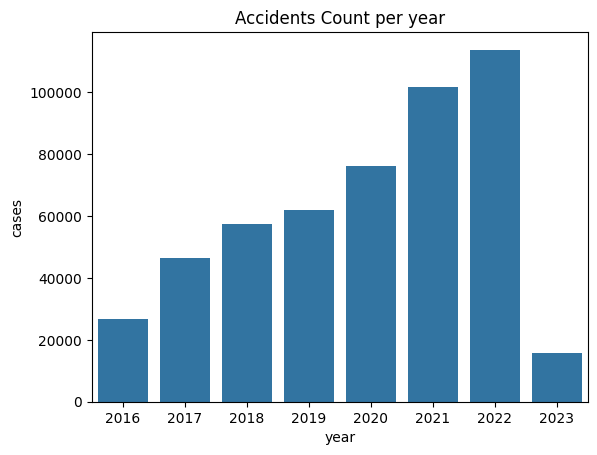

In [71]:
# What is the trend of accidents by year from 2016 to 2023?

year_df = pd.DataFrame(df['Year'].value_counts()).reset_index().sort_values(by='Year', ascending=True)
year = year_df.rename(columns={'Year':'year','count':'cases'})
sns.barplot(x=year.year, y=year.cases)
plt.title("Accidents Count per year")

In [72]:
year_df.style.bar(cmap="Blues")

,Year,count
6,2016,26663
5,2017,46514
4,2018,57578
3,2019,61852
2,2020,76155
1,2021,101740
0,2022,113734
7,2023,15764


Text(0.5, 1.0, 'Average monthly accidents')

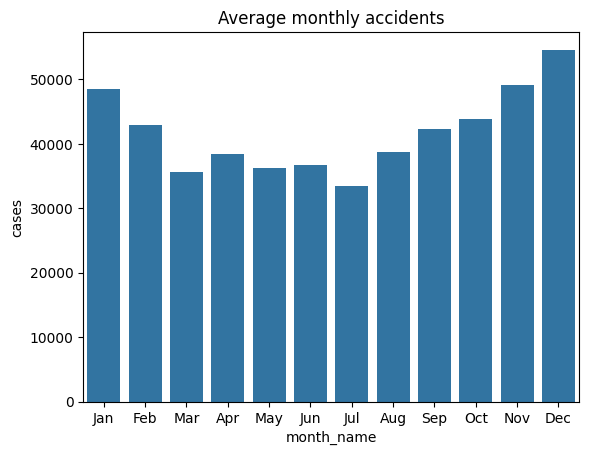

In [73]:
# Which months have the most accidents?

month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index()
month = month_df.rename(columns={'Start_Time':'month','count':'cases'}).sort_values(by='month', ascending=True)

# adding month name as a column
month_map = {1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun', 7:'Jul' , 8:'Aug', 9:'Sep',10:'Oct' , 11:'Nov' , 12:'Dec'}
month['month_name'] = month['month'].map(month_map) 
sns.barplot(x=month.month_name,y=month.cases)
plt.title("Average monthly accidents")

Text(0.5, 1.0, 'Number of Accidents by Day of the Week')

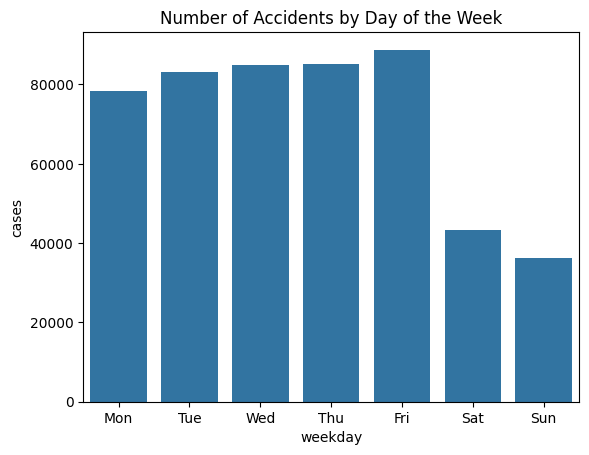

In [74]:
# Which days of the week have a higher probability of accidents? 

week = pd.DataFrame(df['Start_Time'].dt.dayofweek.value_counts()).reset_index()
week = week.rename(columns={'Start_Time':'day_of_week', 'count':'cases'}).sort_values(by='day_of_week')
day_map = {0:'Mon' , 1:'Tue' , 2:'Wed' , 3:"Thu" , 4:'Fri' , 5:"Sat" , 6:'Sun'}   
week['weekday'] = week['day_of_week'].map(day_map)
sns.barplot(x=week.weekday,y=week.cases)
plt.title("Number of Accidents by Day of the Week")

In [75]:
# The number of accidents in friday is statiscal higher than in the other weekdays?

week_days = df[(df["Weekday"] != 5) & (df["Weekday"] != 6)]

friday_accidents = week_days[week_days["Weekday"] == 4]
other_days_accidents = week_days[week_days["Weekday"] != 4] 

friday_counts = friday_accidents.groupby(friday_accidents["Start_Time"].dt.date).size()
other_days_counts = other_days_accidents.groupby(other_days_accidents["Start_Time"].dt.date).size()

# Mann-Whitney U test (Non-parametric test)
u_stat, p_value = stats.mannwhitneyu(friday_counts, other_days_counts, alternative="greater")

print(f"U-statistic: {u_stat:.4f}, P-value: {p_value:.4f}")

U-statistic: 282354.0000, P-value: 0.0168


Text(0.5, 1.0, 'Average Hourly Accidents')

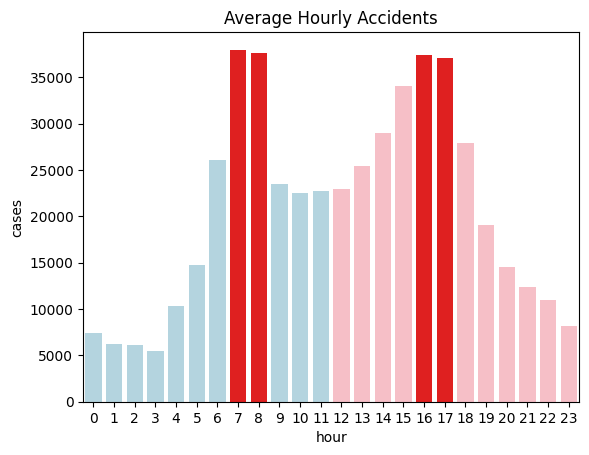

In [76]:
# What is the distribution of hourly accidents throughout the day?

hour_of_day = pd.DataFrame(df['Hour'].value_counts()).reset_index().rename(columns={'Hour':'hour','count':'cases'})
hour_of_day.sort_values(by='hour', inplace=True)

colors = []
for x in hour_of_day['cases']:
    if int(hour_of_day[hour_of_day['cases'] == x]['hour'].iloc[0]) <= 11:
        if x in sorted(hour_of_day['cases'][:12])[-2:]:
            colors.append('red')
        else:
            colors.append('lightblue')
    else:
        if x in sorted(list(hour_of_day['cases'])[12:])[-2:]:
            colors.append('red')
        else:
            colors.append('lightpink') 

legend = "Hourly Accident Rate"
sns.barplot(x="hour", y="cases", hue="hour", data=hour_of_day, palette=colors, legend=False)
plt.title("Average Hourly Accidents")

### Spacial Analysis

In [77]:
# What are the top 5 U.S. states with the highest number of accidents?

state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), 
                                   locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents for each State", geo_scope="usa")
fig.show()

In [78]:
df['State'].value_counts().to_frame().head(10).style.bar(cmap="Blues")

,count
State,
CA,113274
FL,56710
TX,37355
SC,24737
NY,22594
NC,21750
VA,19515
PA,19351
MN,12333


In [79]:
# What are the top 10 Cities with most number of accidents?

df.groupby(["State", "City"]).size().reset_index(name="City_Count").sort_values("City_Count", ascending=False).head(10).style.bar(cmap="Blues")

,State,City,City_Count
2596,FL,Miami,12131
11350,TX,Houston,11019
1258,CA,Los Angeles,10299
6689,NC,Charlotte,8960
11259,TX,Dallas,8203
2655,FL,Orlando,6983
11187,TX,Austin,6229
6943,NC,Raleigh,5553
11078,TN,Nashville,4675
4486,LA,Baton Rouge,4625


In [80]:
# Is there a relationship between the missing cities and some external factor?
# Usage of OpenWeather APY to check the country using coordinates

cities = []

def get_city(lat, lon, api_key):
    retries = 5
    for i in range(retries):
        try:
            url = f'http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}'
            response = requests.get(url, timeout=50)
            dt = response.json()
            
            if response.status_code == 200:
                return dt['name']
        except Exception as e:
            print("Something went wrong accessing city name")
            
def missing_city(df1, api_key):

    for index, row in df1[df1['City'].isnull()].iterrows():
        lat = row['Start_Lat']
        lon = row['Start_Lng']
        
        city = get_city(lat, lon, api_key)
        cities.append(city)

    return df1

api_key = 'cd625bdba0ced920ac5b1dc2f68a634f'
df1 = missing_city(df, api_key)

In [81]:
# Exploring the cities retrieved

print(len(cities))

count_f, count_g = 0, 0
for city in cities:
    if city == "Fairmount Heights":
        count_f += 1
    elif city == "Glassmanor":
        count_g += 1

print(f"Counting Fairmount Heights: {count_f}"+f"\nCounting Glassmanor: {count_g}")

19
Counting Fairmount Heights: 7
Counting Glassmanor: 3


### Environmental Factors Analysis

Text(0.5, 1.0, 'Top Weather Conditions Contributing to Accidents')

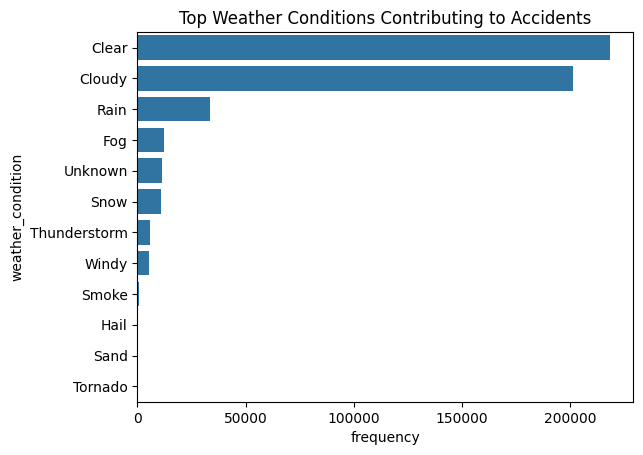

In [82]:
# What are the top weather conditions that contribute to the accidents?

wc = pd.DataFrame(df['Weather_Condition'].value_counts()).reset_index().sort_values(by='count', ascending=False)
wc.rename(columns={'Weather_Condition':'weather_condition', 'count':'frequency'}, inplace=True)

sns.barplot(x='frequency', y='weather_condition', data=wc)
plt.title("Top Weather Conditions Contributing to Accidents")


### Road Conditions Analysis

Text(0.5, 1.0, 'Most frequent road features')

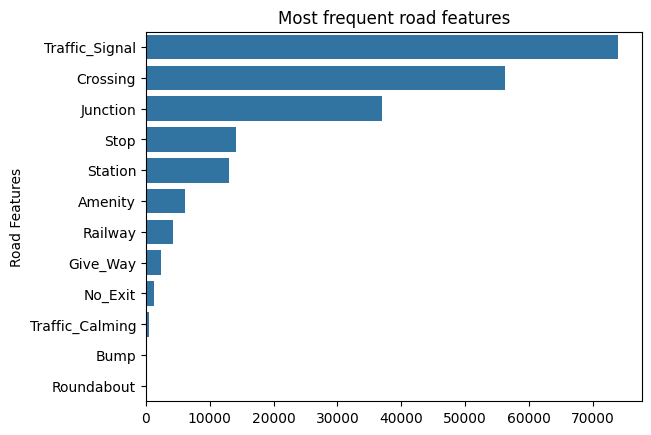

In [83]:
# What were the most common road features during the accidents?

road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", 
                 "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal"]

data = df[road_features].sum().sort_values(ascending=False)

sns.barplot(x=data.values, y=data.index)
plt.ylabel("Road Features")
plt.title("Most frequent road features")

# Pre-processing

### Feature Selection/Extraction

In [84]:
# Extraction of the duration of accidents (witch is the same as time congestion)

df["Start_Time"] = pd.to_datetime(df["Start_Time"], format="mixed", errors='coerce', dayfirst=True)
df["End_Time"] = pd.to_datetime(df["End_Time"], format="mixed", errors='coerce', dayfirst=True)

df["Duration(min)"] = (df["End_Time"] - df["Start_Time"]).dt.total_seconds() / 60

# Checking the existence of outliers
print(len(df[df["Duration(min)"] < 0]))

0


In [85]:
# Extraction of year, month, weekday and day

# Already done in Temporal Analysis

In [86]:
# Reduce the number of weather conditions

# Already done in Severity Analysis

In [87]:
# Bining of Severity (Congestion is not Severe or Severe)

df["Severity"] = df["Severity"].map(lambda x: 0 if x in [1, 2] else 1)

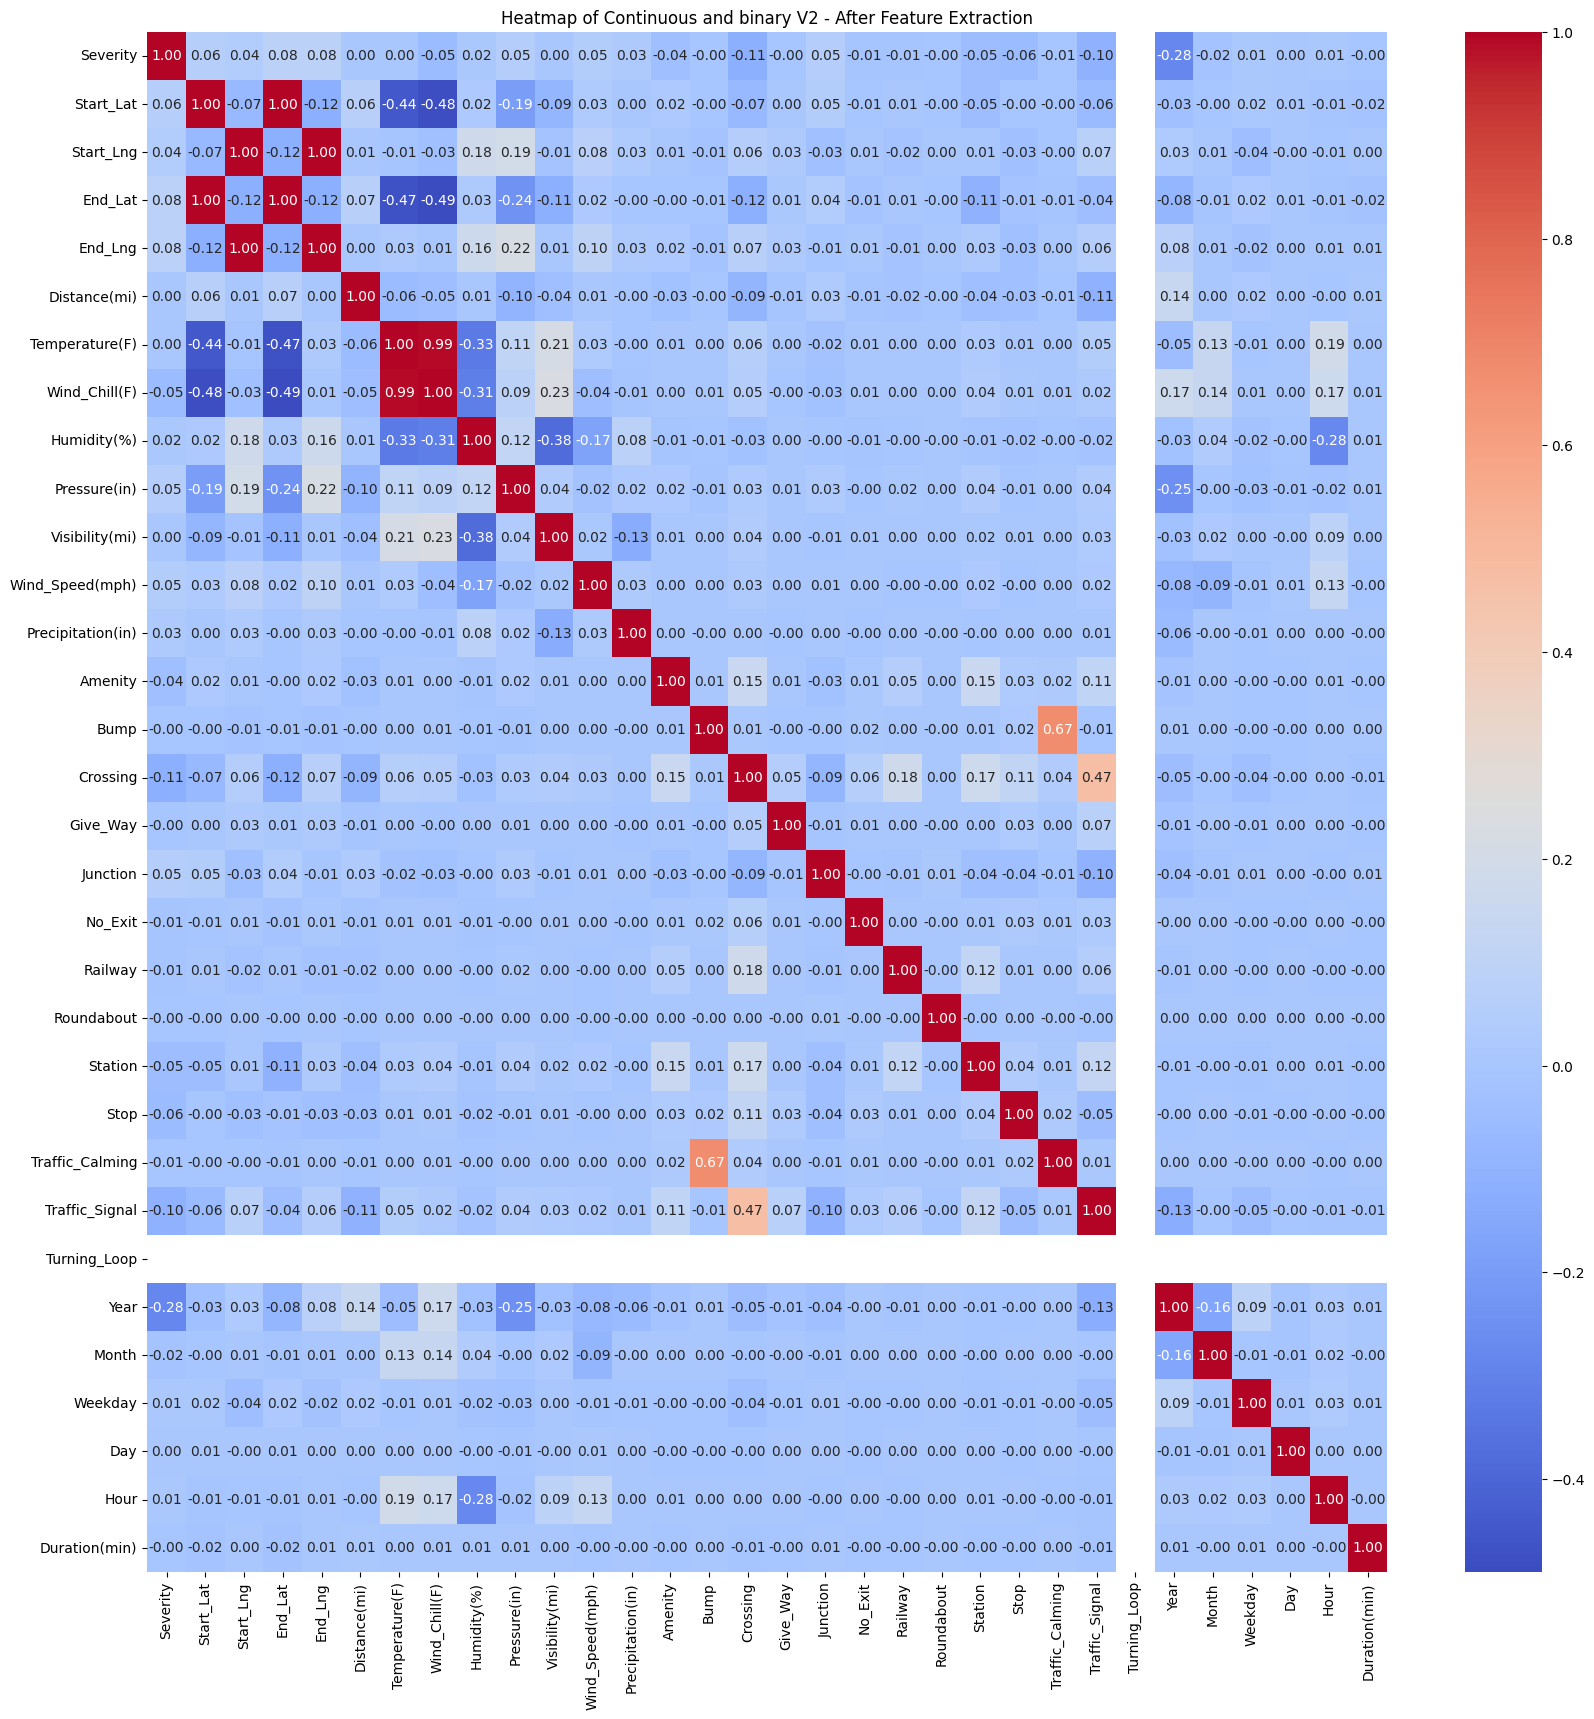

In [88]:
corr_data = df.select_dtypes(include=[np.number,"boolean"])
corr = corr_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Continuous and binary V2 - After Feature Extraction")
plt.show()

In [89]:
# Droping columns that are not relevant for the model

columns = ['ID','Source','End_Lat','End_Lng','End_Time','Start_Time','Description','Airport_Code','Country','Weather_Timestamp',
           'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Timezone','Wind_Direction','Pressure(in)','Zipcode',
           'Precipitation(in)','Humidity(%)','Wind_Chill(F)','Temperature(F)','Sunrise_Sunset','Street','County',
           'State','City']
df1 = df.drop(columns=columns)
df1.head(5)

,Severity,Start_Lat,Start_Lng,Distance(mi),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Year,Month,Weekday,Day,Hour,Duration(min)
0,0,30.641211,-91.153481,0.000,10.0,5.0,Clear,False,False,False,...,False,False,True,False,2019,6,2,12,10,45.033333
1,0,38.990562,-77.399070,0.056,10.0,5.0,Clear,False,False,False,...,False,False,False,False,2022,12,5,3,23,139.650000
2,0,34.661189,-120.492822,0.022,10.0,13.0,Clear,False,False,False,...,False,False,True,False,2022,8,5,20,13,129.750000
3,0,43.680592,-92.993317,1.054,10.0,15.0,Snow,False,False,False,...,False,False,False,False,2022,2,0,21,17,120.316667
4,0,35.395484,-118.985176,0.046,10.0,0.0,Clear,False,False,False,...,False,False,False,False,2020,12,4,4,1,147.150000


### Missing Values Handling

In [90]:
# Checking Missing Values

missing_vals = df1.isna().sum().sort_values(ascending = False) / len(df1) * 100
missing_vals[missing_vals !=0]

Wind_Speed(mph)    7.3974
Visibility(mi)     2.2582
dtype: float64

In [91]:
# Wind_Speed and Visibility Missing Values 

df1.fillna({
    'Wind_Speed(mph)': df['Wind_Speed(mph)'].median(),
    'Visibility(mi)': df['Visibility(mi)'].median()},
    inplace=True)

In [92]:
# Checking once again the existence of Missing values

missing_vals = df1.isna().sum().sort_values(ascending = False) / len(df1) * 100
print(df1.shape)
print(df1.dtypes)
missing_vals[missing_vals !=0]

(500000, 26)
Severity               int64
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Year                   int32
Month                  int32
Weekday                int32
Day                    int32
Hour                   int32
Duration(min)        float64
dtype: object


Series([], dtype: float64)

### Preparing the data before and after the Data Splitting

#####  First Data Splitting

In [ ]:
# Checking the class distribution before balancing
print("Before balancing:", Counter(df1['Severity']))

X = df1.drop(columns=['Severity'])
y = df1['Severity']

Before balancing: Counter({0: 402416, 1: 97584})


##### Balancing and Undersampling 

In [ ]:
# Random Undersampling first to reduce dataset size

undersample = RandomUnderSampler(sampling_strategy=0.7, random_state=17)
X_resampled, y_resampled = undersample.fit_resample(X, y)

print("After Undersampling:", Counter(y_resampled))

After Undersampling: Counter({0: 139405, 1: 97584})


##### Data Splitting into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

##### LOO "Weather_Condition" Encoding

In [ ]:
loo_encoder = LeaveOneOutEncoder()
X_train_encoded = loo_encoder.fit_transform(X_train, y_train)
X_test_encoded = loo_encoder.transform(X_test)

In [ ]:
# Apply Tomek Links to get better class separation
# Try to not do this step and see if the results get better/worse

tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_train_encoded, y_train)  

print("After Tomek Links:", Counter(y_train))

After Tomek Links: Counter({0: 111753, 1: 77838})


In [ ]:
# Checking train target balance

severity_counts = y_tomek.value_counts().sort_index()
total_cases = y_tomek.shape[0]
severity_percentages = (severity_counts / total_cases) * 100
severity_percentages

Severity
0    55.664789
1    44.335211
Name: count, dtype: float64

In [ ]:
# Checking test target balance

severity_counts = y_test.value_counts().sort_index()
total_cases = y_test.shape[0]
severity_percentages = (severity_counts / total_cases) * 100
severity_percentages

Severity
0    58.340014
1    41.659986
Name: count, dtype: float64

In [ ]:
print(f"X_train: {X_tomek.shape}")
print(f"X_test: {X_test_encoded.shape}")
print(X_tomek)

X_train: (175567, 25)
X_test: (47398, 25)
        Start_Lat   Start_Lng  Distance(mi)  Visibility(mi)  Wind_Speed(mph)  \
0       43.087219  -77.609222         0.000            10.0             10.0   
1       34.799030  -82.467789         0.000            10.0              6.0   
2       25.970295  -80.165723         0.793            10.0             14.0   
3       40.673146  -75.292551         1.084            10.0             10.4   
4       36.445544 -119.798172         3.040             3.0              5.0   
...           ...         ...           ...             ...              ...   
175562  33.595743  -86.397719         0.126            10.0              0.0   
175563  32.328711  -95.290437         0.281            10.0             14.0   
175564  37.557037 -122.299433         1.383            10.0              0.0   
175565  33.807290 -118.207180         1.340            10.0              9.2   
175566  44.975204  -93.502077         0.027            10.0              7.0  

##### Standardized the Data

In [ ]:
# Doing Standardization after splitting to avoid data leakage

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_tomek)
X_test_scaled = scaler.transform(X_test_encoded) 

##### PCA on the Data

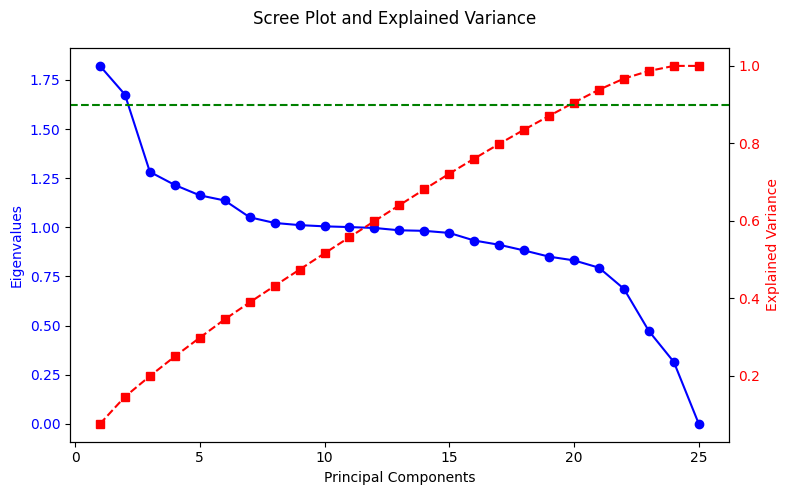

In [ ]:
# Using PCA
pca_gr = PCA() 

pca_gr.fit(X_train_scaled)

explained_variance = pca_gr.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

eigenvalues = pca_gr.singular_values_ ** 2 / (len(X_train_scaled) - 1)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Eigenvalues
ax1.set_xlabel("Principal Components")
ax1.set_ylabel("Eigenvalues", color="b")
ax1.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color="b", label="Eigenvalues")
ax1.tick_params(axis='y', labelcolor="b")

# Explained Variance
ax2 = ax1.twinx()
ax2.set_ylabel("Explained Variance", color="r")
ax2.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='s', linestyle='--', color="r")
ax2.tick_params(axis='y', labelcolor="r")

# Setting horizaontal line for 90% explained variance
ax2.axhline(y=0.9, color='g', linestyle='--')

fig.suptitle("Scree Plot and Explained Variance")
fig.tight_layout()
plt.show()

In [ ]:
# Using PCA 

pca = PCA(n_components=20) 

X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

# Models Implementation

### Baselines for Decision Tree, KNN and Naive Bayes

In [ ]:
# Baseline models

def evaluate_model(model_name, y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    print(f"{model_name} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train_scaled, y_tomek)
y_pred_dt = dt.predict(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_tomek)
y_pred_knn = knn.predict(X_test_scaled)

nb = GaussianNB()
nb.fit(X_train_scaled, y_tomek)
y_pred_nb = nb.predict(X_test_scaled)       

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Naive Bayes", y_test, y_pred_nb)

Decision Tree - Precision: 0.5823, Recall: 0.6400, F1-Score: 0.6098
KNN - Precision: 0.6303, Recall: 0.6599, F1-Score: 0.6448
Naive Bayes - Precision: 0.4501, Recall: 0.9245, F1-Score: 0.6055


### Testing Hyperparameter Tuning Without GridSeachCV

##### Decision Tree Fine-Tuning Guidance

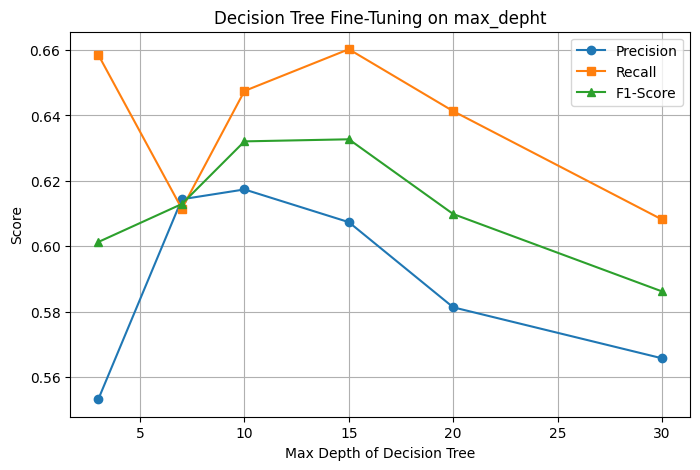

In [105]:
# Decision Tree Fine-Tuning Guidance

levels = [3,7,10,15,20,30]
precisions = []
recalls = []
f1_scores = []
for max_depht in levels:
    dt = DecisionTreeClassifier(max_depth=max_depht)
    dt.fit(X_train_scaled, y_tomek)
    y_pred_dt = dt.predict(X_test_scaled)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

plt.figure(figsize=(8, 5))
plt.plot(levels, precisions, marker='o', label="Precision", linestyle='-')
plt.plot(levels, recalls, marker='s', label="Recall", linestyle='-')
plt.plot(levels, f1_scores, marker='^', label="F1-Score", linestyle='-')

plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Score")
plt.title("Decision Tree Fine-Tuning on max_depht")
plt.legend()
plt.grid()
plt.show()

##### Knn Fine-Tuning Guidance

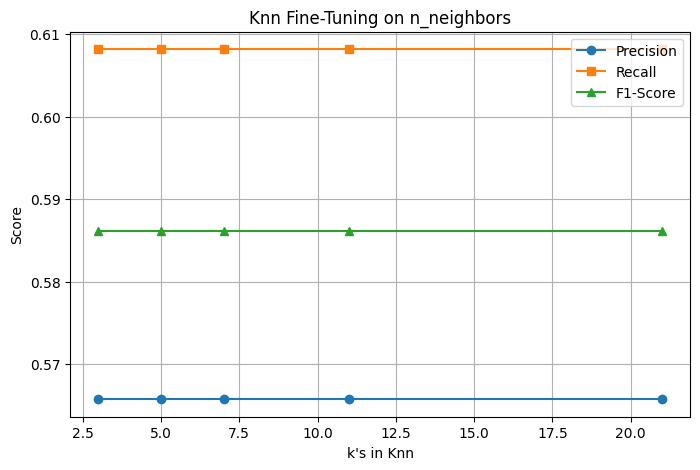

In [106]:
# Knn Fine-Tuning Guidance

levels = [3,5,7,11,21]
precisions.clear()
recalls.clear()
f1_scores.clear()
for k in levels:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_tomek)
    y_pred_knn = knn.predict(X_test_scaled)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

plt.figure(figsize=(8, 5))
plt.plot(levels, precisions, marker='o', label="Precision", linestyle='-')
plt.plot(levels, recalls, marker='s', label="Recall", linestyle='-')
plt.plot(levels, f1_scores, marker='^', label="F1-Score", linestyle='-')

plt.xlabel("k's in Knn")
plt.ylabel("Score")
plt.title("Knn Fine-Tuning on n_neighbors")
plt.legend()
plt.grid()
plt.show()